In [354]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import numpy.linalg as la
import scipy.optimize as op
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw 
import matplotlib.image as mpimg 

## Week 8 | Exercise 7 | Principle Component Analysis and K-Means Clustering

### K-means clustering

In [11]:
# Load an example dataset that we will be using

matdata = loadmat('machine-learning-ex7/ex7/ex7data2.mat')
X = matdata['X']
X.shape

(300, 2)

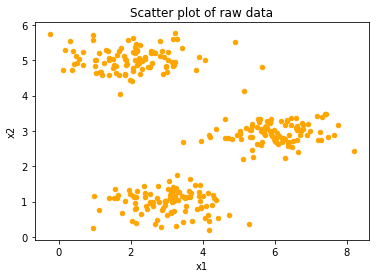

In [28]:
data= pd.DataFrame(X)
data.plot(kind='scatter',x=0,y=1,color='orange')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of raw data')
plt.show()

In [59]:
def findClosestCentroids(X, centroids):
    # The function computes the centroid memberships for every example
    # idx = findClosestCentroids (X, centroids) returns the closest centroids   
    # in idx for a dataset X where each row is a single example. idx = m x 1 
    # vector of centroid assignments (i.e. each entry in range [1..K])
    idx = []
    for i in range(len(X)):
        ik = []
        for k in range(len(centroids)):
            xd = la.norm(X[i] - centroids[k])
            ik.append(xd)
        min_ind = np.argmin(ik) # make it 0-indexed
        idx.append(min_ind)
    idx = np.array(idx).reshape(-1, 1)
    return idx    

In [58]:
# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = [[3, 3], [6, 2], [8, 5]]

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(idx[0:3])
print('\n(the closest centroids should be 1, 3, 2 respectively)\n')

print('Program paused. Press enter to continue.\n')


Closest centroids for the first 3 examples: 

[[0]
 [2]
 [1]]

(the closest centroids should be 1, 3, 2 respectively)

Program paused. Press enter to continue.



In [142]:
def computeCentroids(X, centroid_idx):
    m, n = X.shape
    K = len(np.unique(centroid_idx))
    centroids = np.zeros([K, n])
    
    for k in range(K):
        miu = []
        for i in range(m):
            if centroid_idx[i] == k:
                miu.append(X[i])
            else:
                continue
                
        centroids[k] = np.mean(miu,axis =0)       
    return centroids

In [143]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx)
print('\nComputing centroids means.\n\n', centroids)


Computing centroids means.

 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [172]:
def runkMeans(X, initial_centroids, max_iters):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X is a single example
    # It uses initial_centroids used as the initial centroids. max_iters specifies the total number of interactions 
    # of K-Means to execute. plot_progress is a true/false flag that  indicates if the function should 
    # also plot its progress as the learning happens. This is set to false by default. runkMeans returns 
    # centroids, a Kxn matrix of the computed centroids and idx, a m x 1 vector 
    # of centroid assignments (i.e. each entry in range [1..K])
    
    # Initialize values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    idx = np.zeros([m, 1])
    # Run K-Means
    for i in range(max_iters):
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
    
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx)
    
    return centroids, idx 

In [168]:
def kMeansInitCentroids(X, K):
    #This function initializes K centroids that are to be used in K-Means on the dataset X
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    return centroids

In [173]:
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx  = runkMeans(X, initial_centroids, max_iters = 100)

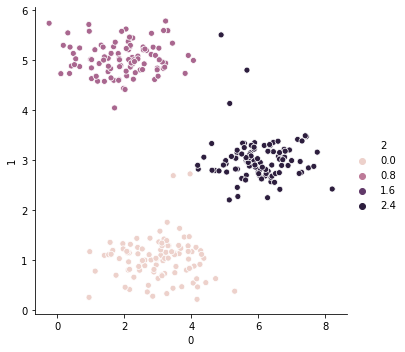

In [179]:
X_idx = np.append(X, idx, axis = 1)
X_idx = pd.DataFrame(X_idx)
sns.relplot(x=0, y=1, 
            hue=2, kind="scatter",
            data=X_idx)

### K-means on pixels

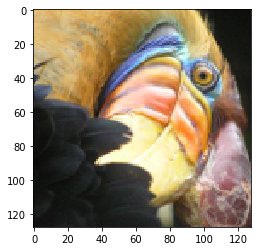

In [192]:
img = mpimg.imread('machine-learning-ex7/ex7/bird_small.png')
plt.imshow(img) 

In [193]:
imgdata= loadmat('machine-learning-ex7/ex7/bird_small.mat')
A = imgdata['A']

In [194]:
# Divide by 255 so that all values are in the range 0 - 1
A = A / 255

# This creates a three-dimensional matrix A whose first two indices identify
# a pixel position and whose last index represents red, green, or blue. For
# example, A(50, 33, 3) gives the blue intensity of the pixel at row 50 and
# column 33.
print('Original image shape:', A.shape)

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape((A.shape[0] * A.shape[1]), 3)
print('reshape:', X.shape)

Original image shape: (128, 128, 3)
reshape: (16384, 3)


In [195]:
# Run your K-Means algorithm on this data
K = 16; 
max_iters = 10;

initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)


Applying K-Means to compress an image.


Compressed, with %d colors: 16


Text(0.5, 1.0, '')

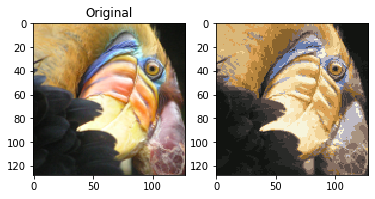

In [211]:
print('\nApplying K-Means to compress an image.\n\n')
# We can now recover the image from the indices (idx) by mapping each pixel specified by 
# its index in idx) to the centroid value.
X_recovered = centroids[idx,:]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], 3)

# Display the original image 
plt.subplot(1, 2, 1)
plt.imshow(A) 
plt.title('Original')

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered) 
plt.title(print('Compressed, with %d colors:', K))

### Principal Component Analysis

In [318]:
matdata = loadmat('machine-learning-ex7/ex7/ex7data1.mat')
X = matdata['X']
X.shape

(50, 2)

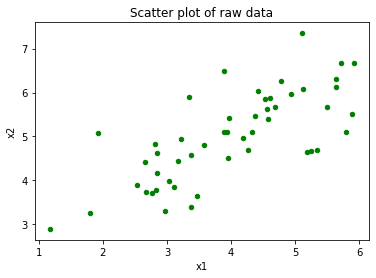

In [319]:
data= pd.DataFrame(X)
data.plot(kind='scatter',x=0,y=1,color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of raw data')
plt.show()

In [320]:
def featureNormalize(X):
    d = X.shape[0]
    n = X.shape[1]
    X_norm = np.zeros(X.shape)
    for d in range(X.shape[0]):
        mu = np.mean(X[d, :])
        std = np.std(X[d, :])
        X_norm[d, :] = (X[d, :] - mean)/std
    return X_norm, mu, std

In [321]:
X_norm, mu, std = featureNormalize(X)

In [324]:
def pca(X):

    # PCA Run principal component analysis on the dataset X
    # Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    
    # Useful values
    m, n = X.shape
    
    # First, compute the covariance matrix
    sigma = 1/m * X.T @ X
    
    # Then, compute eigenvectors of the covariance matrix
    u,s,v = la.svd(sigma)
    
    return u,s,v

In [327]:
def projectData(X, U, K):

    # The function computes the reduced data representation when projecting 
    # only on to the top k eigenvectors
    # Z = projectData(X, U, K) computes the projection of 
    # the normalized inputs X into the reduced dimensional space spanned by
    # the first K columns of U. It returns the projected examples in Z.

    #Z = zeros(size(X, 1), K);

    Ured = U[:, 0:K]
    Z = X @ Ured
    return Z

In [255]:
U,S,V = pca(X_norm)

In [238]:
U.shape, S.shape, V.shape

((2, 2), (2,), (2, 2))

In [270]:

Ur = U[:, 0:1]

In [271]:
Ur

array([[-0.70853749],
       [-0.70567317]])

In [263]:
print('Top eigenvector: \n');
print(' U(:,1) = %f %f \n'% (U[0,0], U[1,0]))

Top eigenvector: 

 U(:,1) = -0.708537 -0.705673 



In [336]:
def recoverData(Z, U, K):
    Ured = U[:, 0:K]
    Xapprox = Z @ Ured.T
    return Xapprox

### Project data (image)

#### Plot data

In [365]:
# The dataset ex7faces.mat contains a dataset3 X of face images, each 32 * 32 = 1024 in grayscale.
# Each row of X corresponds to one face image (a row vector of length 1024).
matdata = loadmat('machine-learning-ex7/ex7/ex7faces.mat')
X =matdata['X']
X.shape

(5000, 1024)

In [366]:
def save_images(images,filename):
    
    from PIL import Image
    # Compute number of items to display
    row = int(math.floor(math.sqrt(len(images))))
    col = int(math.ceil(len(images)/row))
    
    # for each image
    w = int(math.sqrt(images.shape[1]))
    h = int(np.round(images.shape[1]/w))
    
    height = row * h
    width = col * w
    output = np.zeros((height, width))

    for i in range(row):
        for j in range(col):
            image = images[i*row+j]
            image = image.reshape(h,w)
            output[i*h:i*h + h,j*w:j*w+w] = image
    output = (output * 255).clip(0,255).astype('uint8')
    output = output.T
    im = Image.fromarray(output)
    im.save(filename)
    im.show()

In [367]:
filename = 'faces.png'
save_images(X,filename)

#### PCA on Faces

In [357]:
X_norm, mu, std = featureNormalize(X)

In [358]:
U,S,V = pca(X_norm)

In [351]:
U.shape

(1024, 1024)

In [359]:
K = 100
Z = projectData(X_norm, U, K)

In [341]:
Z.shape

(5000, 100)

In [362]:
Xapprox = recoverData(Z, U, 100)

In [360]:
filename1 = 'reduction.png'
save_images(Z,filename1)

In [364]:
filename2 = 'recovery.png'
save_images(Xapprox,filename2)